# Decision Tree Classifier on Adult Income Dataset (Predicting >50K Income)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt


## Load & Inspect Data

In [39]:
df = pd.read_csv("income_predict.csv.csv")

df.columns=df.columns.str.strip()
df=df.apply(lambda x : x.str.strip() if x.dtypes =="object" else x)
df.replace('?', np.nan, inplace=True)


df=df.dropna().reset_index(drop=True)

print(df.columns)
print(df.dtypes)
print(df.describe())


print(df.isnull().sum())





Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       

## Encode Categorical Variables

In [40]:
y=df['class'].apply(lambda x: 1 if x=='>50K' else 0)

df=df.drop("class",axis=1)

cat_columns=df.select_dtypes(include=['object','category']).columns.tolist()
df=pd.get_dummies(df,columns=cat_columns,drop_first=True)
x=df

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)




## Grid Search for Hyperparameters

In [6]:
par={"criterion":["gini","entropy"]
    ,"max_depth":range(2,10),
    "min_samples_leaf":range(2,10),
     "min_samples_split":range(2,10)
    }
grid=GridSearchCV(DecisionTreeClassifier(random_state=42),par,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)

print("best parameter: ",grid.best_params_)
print("best score: ",grid.best_score_)



best parameter:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2}
best score:  0.8529570525800445


## Train Base Decision Tree

In [14]:
model=DecisionTreeClassifier(**grid.best_params_,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.85513011768606
Confusion Matrix:
 [[4265  238]
 [ 636  894]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4503
           1       0.79      0.58      0.67      1530

    accuracy                           0.86      6033
   macro avg       0.83      0.77      0.79      6033
weighted avg       0.85      0.86      0.85      6033



## Cost Complexity Pruning

In [ ]:
full_tree=DecisionTreeClassifier(random_state=42)
full_tree.fit(x_train,y_train)
path=full_tree.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas

best_score=0
best_alpha=0

for alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    clf.fit(x_train,y_train)
    scores=cross_val_score(clf,x_train,y_train,cv=5)
    score=scores.mean()
    if score>best_score:
        best_score=score
        best_alpha=alpha
print("best alpha: ",best_alpha)
print("best score",best_score)
print("=============================================================================================")

pruned_tree=DecisionTreeClassifier(ccp_alpha=best_alpha,random_state=42)
pruned_tree.fit(x_train,y_train)
pruned_tree_pred=pruned_tree.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pruned_tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pruned_tree_pred))
print("Classification Report:\n", classification_report(y_test, pruned_tree_pred))

    

## Visualize Pruned Decision Tree

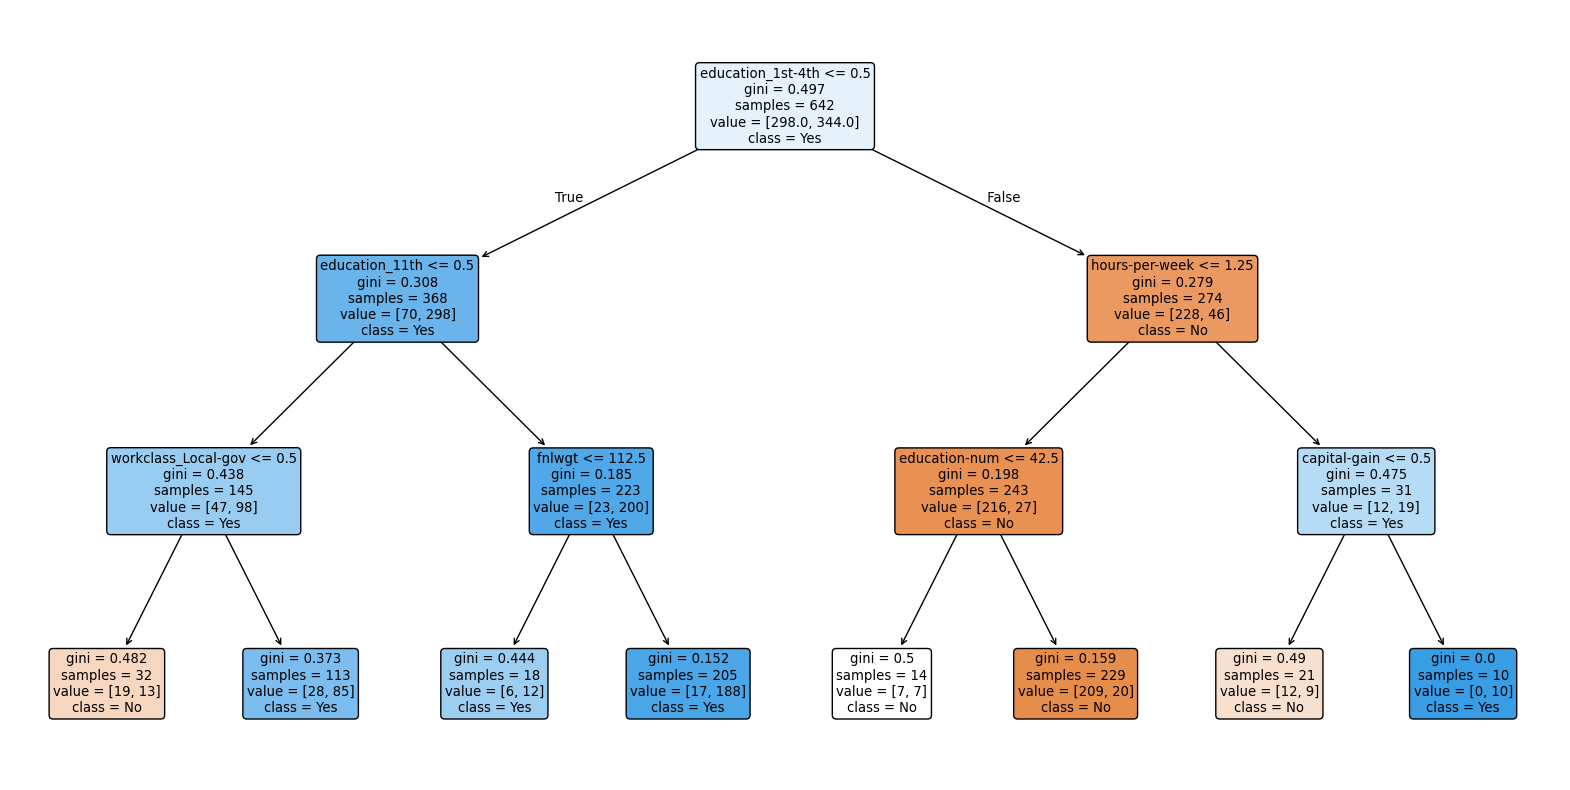

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=['No','Yes'], filled=True, rounded=True)
plt.show()


# Predict New User Input

In [49]:
user_input = {
    "workclass": input("Workclass (Private/Self-emp-not-inc/Self-emp-inc/Federal-gov/Local-gov/State-gov/Without-pay/Never-worked): ").title().strip(),
    "education": input("Education (Preschool/1st-4th/5th-6th/7th-8th/9th/10th/11th/12th/HS-grad/Some-college/Assoc-acdm/Assoc-voc/Bachelors/Masters/Doctorate/Prof-school): ").title().strip(),
    "marital_status": input("Marital Status (Married-civ-spouse/Divorced/Never-married/Separated/Widowed/Married-spouse-absent/Married-AF-spouse): ").title().strip(),
    "occupation": input("Occupation (Tech-support/Craft-repair/Other-service/Sales/Exec-managerial/Prof-specialty/Handlers-cleaners/Machine-op-inspct/Adm-clerical/Farming-fishing/Transport-moving/Priv-house-serv/Protective-serv/Armed-Forces): ").title().strip(),
    "relationship": input("Relationship (Wife/Own-child/Husband/Not-in-family/Other-relative/Unmarried): ").title().strip(),
    "race": input("Race (White/Asian-Pac-Islander/Amer-Indian-Eskimo/Other/Black): ").title().strip(),
    "sex": input("Sex (Male/Female): ").title().strip(),
    "capital_gain": int(input("Capital Gain: ")),
    "capital_loss": int(input("Capital Loss: ")),
    "hours_per_week": int(input("Hours per week: ")),
    "native_country": input("Native Country (United-States/Cambodia/England/Puerto-Rico/Canada/Germany/...): ").title().strip()
}



new_data=pd.DataFrame([user_input])
categ_columns=new_data.select_dtypes(include=["object","category"]).columns.tolist()
encode_data=pd.get_dummies(new_data,columns=categ_columns,drop_first=True)
model_columns=x.columns

reindex_data=encode_data.reindex(columns=model_columns,fill_value=0)

prediction=model.predict(reindex_data)

if prediction[0] == 1:
    print("his income is more than 50k")
    
if prediction[0] == 0:
    print("his income is less than or equle  50k")




Workclass (Private/Self-emp-not-inc/Self-emp-inc/Federal-gov/Local-gov/State-gov/Without-pay/Never-worked):  Private
Education (Preschool/1st-4th/5th-6th/7th-8th/9th/10th/11th/12th/HS-grad/Some-college/Assoc-acdm/Assoc-voc/Bachelors/Masters/Doctorate/Prof-school):  Doctorate
Marital Status (Married-civ-spouse/Divorced/Never-married/Separated/Widowed/Married-spouse-absent/Married-AF-spouse):  Married-civ-spouse
Occupation (Tech-support/Craft-repair/Other-service/Sales/Exec-managerial/Prof-specialty/Handlers-cleaners/Machine-op-inspct/Adm-clerical/Farming-fishing/Transport-moving/Priv-house-serv/Protective-serv/Armed-Forces):  Tech-support
Relationship (Wife/Own-child/Husband/Not-in-family/Other-relative/Unmarried):  Husband
Race (White/Asian-Pac-Islander/Amer-Indian-Eskimo/Other/Black):  Black
Sex (Male/Female):  Male
Capital Gain:  5004
Capital Loss:  210
Hours per week:  45
Native Country (United-States/Cambodia/England/Puerto-Rico/Canada/Germany/...):  England


his income is less than or equle  50k
